# Simulate and Compare different Dynamics

In [ ]:
from rumor_centrality import graph_simulations
from rumor_centrality import graph_generator

g = graph_generator.synthetic_internet(200)


In [ ]:

from rumor_centrality.graph_visualization import multiple_histograms
from tqdm import tqdm


In [ ]:
models_si = []
for i in tqdm(range(10000)):
    models_si.append(graph_simulations.si(g, -1, 0.1, 1, 100))


In [ ]:
models_sis = []
for i in tqdm(range(10000)):
    models_sis.append(graph_simulations.sis(g, -1, 0.3, 0.1, 1, 100, max_no_change=10))
models_sis = [m for m in models_sis if 50 < len(m[0].nodes())]


In [ ]:
models_sir = []
for i in tqdm(range(10000)):
    models_sir.append(graph_simulations.sir(g, -1, 0.3, 0.1, 1, 100, max_no_change=10))
models_sir = [m for m in models_sir if 50 < len(m[0].nodes())]

In [ ]:
multiple_histograms([[len(m.nodes()) for (m, _) in models_si], [len(m.nodes()) for (m, _) in models_sis], [len(m.nodes()) for (m, _) in models_sir]], ["SI", "SIS", "SIR"], "Size", "Count", "Models with aboard if 10 times no change")

In [ ]:
size = 87
sized_models_si = [m for m in models_si if len(m[0].nodes()) == size]
sized_models_sis = [m for m in models_sis if len(m[0].nodes()) == size]
sized_models_sir = [m for m in models_sir if len(m[0].nodes()) == size]

print(f"SI: {len(sized_models_si)}, SIS: {len(sized_models_sis)}, SIR: {len(sized_models_sir)}")

In [ ]:
import random

def shuffle(l):
    random.shuffle(l)
    return l

min_size = min(len(sized_models_si), len(sized_models_sis), len(sized_models_sir))
print("Min Size", min_size)

rand_models_si = shuffle(models_si)[0:min_size]
rand_models_sis = shuffle(models_sis)[0:min_size]
rand_models_sir = shuffle(models_sir)[0:min_size]

print(f"SI: {len(rand_models_si)}, SIS: {len(rand_models_sis)}, SIR: {len(rand_models_sir)}")

In [3]:
from rumor_centrality import rumor_detection
import networkx as nx

def predict_center(infected_graph_adj):
    return rumor_detection.get_center_prediction(rumor_detection.networkx_graph_to_adj_list(infected_graph_adj), use_fact=False)

def get_hop_distance(g, center: int, predicted_center: int):
    return nx.shortest_path_length(g, center, predicted_center)

def predict(models):
    results = []
    for infection, center in models:
        if len(infection.nodes) == 0:
            results.append((None, len(infection.nodes)))
            continue

        predicted = predict_center(infection)
        hop_distance = get_hop_distance(g, center[0], predicted[0])
        results.append(hop_distance)
    return results

In [ ]:
prediction_si = predict(rand_models_si)

In [ ]:
prediction_sis = predict(rand_models_sis)

In [ ]:
prediction_sir = predict(rand_models_sir)

In [ ]:
multiple_histograms([prediction_si, prediction_sis, prediction_sir], ["SI", "SIS", "SIR"], "Size", "Count", "Models with aboard if 10 times no change", mod=1)

In [11]:
from rumor_centrality import graph_simulations
from rumor_centrality import graph_generator
from tqdm import tqdm

g = graph_generator.synthetic_internet(200)
result, i = graph_simulations.si(g, -1, 0.3, 1, 100, fill_infection_count=True)

predictions = []
count = 5
for ii in range(count):
    models = []
    for i in tqdm(range(100)):
        models.append(graph_simulations.si(g, -1, 0.1, 1, 200.0 / count * ii, fill_infection_count=True))
    predictions.append(predict(models))


100%|██████████| 100/100 [00:02<00:00, 45.04it/s]


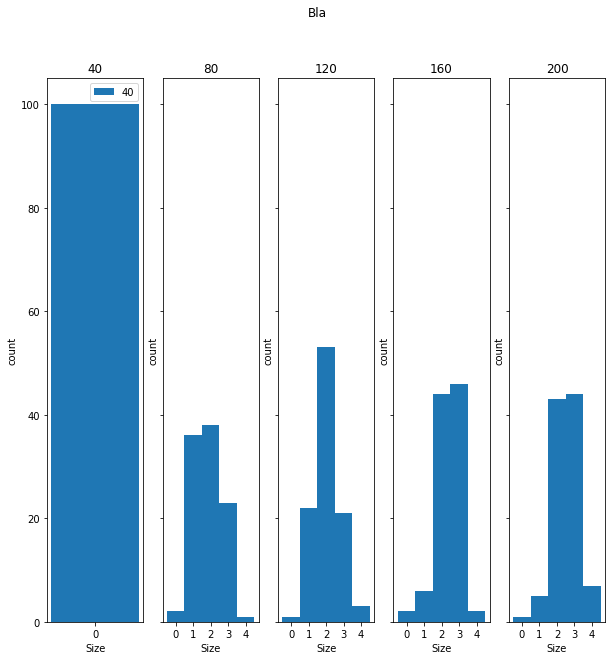

In [13]:
from rumor_centrality.graph_visualization import multiple_histograms


multiple_histograms(predictions, ["40", "80", "120", "160", "200"], "Size", "count", "Bla", mod=1)
